In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import tensorflow

In [26]:
# Read in csv (already transformed)
hosp_df = pd.read_csv('..//..//data/hospitals/LA_Ed_MergedwithHosp19_new.csv')
# Fill the null columns where all values are null
hosp_df = hosp_df.fillna(" ")
hosp_df

,oshpd_id,facility_name,control_type_desc,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,licensed_bed_size,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,HispanicorLatino,NonHis,Unknown_Eth,Acute_Care,Against_Medical_Advice,Died,Other_Disp,Prison_Jail,Psychiatric_Care,Routine,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_Payer,DX_All_Pregnancies,DX_Birth_Defects,DX_Blood_Disorders,DX_Cancer,DX_Circulatory_System,DX_Digestive_System,DX_Ear_Disorders,DX_Endocrine_Diseases,DX_Eye_Disorders,DX_Genitourinary_System,DX_Infections,DX_Injuries_Poisonings,DX_Mental_Disorders,DX_Musculoskeletal_System,DX_Nervous_System,DX_Other_Reasons,DX_Perinatal_Disorders,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish,LATITUDE,LONGITUDE,Target,Target_1,Label,Label_1,SPA
0,106190017,ALHAMBRA HOSPITAL MEDICAL CENTER,Investor - Individual,100 SOUTH RAYMOND AVENUE,ALHAMBRA,91801,100-149,9120,6972,1375,1514,2882,2409,2043,2274,1541,947,994,114,10744,5329,20,367,395,5,1,35,164,14761,1550,2810,272,10554,907,,239,3,51,42,264,1175,507,159,155,1042,345,3637,834,1046,467,155,1,1908,672,3391,,16093,1493,12664,1936,34.089880,-118.144900,0.830526,0.415716,False,True,3
1,106190034,ANTELOPE VALLEY HOSPITAL,District,1600 WEST AVENUE J,LANCASTER,93534,300-499,65991,48013,15547,12697,20538,17888,13452,13661,9176,4484,3092,3472,44752,66236,3018,379,5021,159,,2143,249,105530,73628,15533,3384,14544,6916,2,5028,16,899,327,2256,5538,2473,1939,1321,6816,3416,19962,4572,6727,2205,7182,158,14634,3786,24751,1,114007,642,101899,11466,34.687800,-118.157981,0.896830,0.307064,True,False,7
2,106190045,CATALINA ISLAND MEDICAL CENTER,Non-profit Corporation (incl. Church-related),100 FALLS CANYON ROAD,AVALON,90704,100-149,1120,1016,209,279,320,279,234,269,259,125,119,42,794,1340,2,174,8,1,,1,,1947,570,283,30,849,404,,34,,2,3,81,132,80,40,27,92,35,617,117,177,47,9,2,182,102,357,,2136,22,1419,695,33.338870,-118.333690,0.996493,0.300857,True,False,8
3,106190053,ST. MARY MEDICAL CENTER - LONG BEACH,Non-profit Corporation (incl. Church-related),1050 LINDEN AVENUE,LONG BEACH,90813,300-499,24414,22547,4426,3669,8981,8241,6589,6753,4369,1881,1100,964,20679,26172,121,510,1559,73,,550,295,43805,32463,6331,568,4069,3525,17,1502,10,135,107,851,3049,919,603,566,3045,1104,8763,1674,4318,1111,1597,45,5478,2406,9689,1,46973,251,39420,7302,33.780238,-118.186641,0.914446,0.368958,True,True,8
4,106190081,BEVERLY HOSPITAL,Non-profit Corporation (incl. Church-related),309 WEST BEVERLY BOULEVARD,MONTEBELLO,90640,200-299,15810,13452,3770,3147,5239,4326,3551,3289,2267,1588,1425,659,25569,3489,204,284,1452,44,,13,226,26651,16588,7198,460,1736,3260,20,717,17,103,67,464,1638,724,437,261,1762,581,5443,1305,2644,466,1310,24,2575,1089,7635,,29262,296,23196,5770,34.016140,-118.101320,0.779400,0.322643,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,106191231,LOS ANGELES COUNTY OLIVE VIEW-UCLA MEDICAL CENTER,City or County,14445 OLIVE VIEW DRIVE,SYLMAR,91342,300-499,30669,30562,2684,4270,9556,10759,11547,11783,7177,2006,893,559,42912,17195,1128,847,224,17,,353,4464,54807,44266,4194,4681,3017,5044,33,908,22,231,289,1171,3077,1014,1092,1538,4366,1190,5736,6416,6855,750,1719,20,2951,2333,19557,,61235,1621,29815,29799,34.324180,-118.452550,0.856124,0.283026,False,False,2
65,106191450,KAISER FOUNDATION HOSPITAL - WOODLAND HILLS,Non-profit Corporation (incl. Church-related),5601 DE SOTO AVENUE,WOODLAND HILLS,91367,200-299,21729,18861,2886,2918,5343,4330,3999,4854,5020,5033,5657,551,9862,30519,210,451,367,27,,7,489,37949,7445,13214,90,17765,2056,21,462,6,254,129,2146,2643,739,1010,488,2428,1097,7874,1623,2833,1310,558,34,3454,1178,10325,,40591,999,3710

In [27]:
print(hosp_df.shape)

(69, 67)


In [28]:
# Set features. This will also be used as your x values.
selected_features = hosp_df.iloc[:, 7:62]
print(selected_features.shape)

(69, 55)


In [29]:
selected_features

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,HispanicorLatino,NonHis,Unknown_Eth,Acute_Care,Against_Medical_Advice,Died,Other_Disp,Prison_Jail,Psychiatric_Care,Routine,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_Payer,DX_All_Pregnancies,DX_Birth_Defects,DX_Blood_Disorders,DX_Cancer,DX_Circulatory_System,DX_Digestive_System,DX_Ear_Disorders,DX_Endocrine_Diseases,DX_Eye_Disorders,DX_Genitourinary_System,DX_Infections,DX_Injuries_Poisonings,DX_Mental_Disorders,DX_Musculoskeletal_System,DX_Nervous_System,DX_Other_Reasons,DX_Perinatal_Disorders,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,DX_Births,ED_Visit,All_Other_Languages,English,Spanish,LATITUDE,LONGITUDE
0,9120,6972,1375,1514,2882,2409,2043,2274,1541,947,994,114,10744,5329,20,367,395,5,1,35,164,14761,1550,2810,272,10554,907,,239,3,51,42,264,1175,507,159,155,1042,345,3637,834,1046,467,155,1,1908,672,3391,,16093,1493,12664,1936,34.089880,-118.144900
1,65991,48013,15547,12697,20538,17888,13452,13661,9176,4484,3092,3472,44752,66236,3018,379,5021,159,,2143,249,105530,73628,15533,3384,14544,6916,2,5028,16,899,327,2256,5538,2473,1939,1321,6816,3416,19962,4572,6727,2205,7182,158,14634,3786,24751,1,114007,642,101899,11466,34.687800,-118.157981
2,1120,1016,209,279,320,279,234,269,259,125,119,42,794,1340,2,174,8,1,,1,,1947,570,283,30,849,404,,34,,2,3,81,132,80,40,27,92,35,617,117,177,47,9,2,182,102,357,,2136,22,1419,695,33.338870,-118.333690
3,24414,22547,4426,3669,8981,8241,6589,6753,4369,1881,1100,964,20679,26172,121,510,1559,73,,550,295,43805,32463,6331,568,4069,3525,17,1502,10,135,107,851,3049,919,603,566,3045,1104,8763,1674,4318,1111,1597,45,5478,2406,9689,1,46973,251,39420,7302,33.780238,-118.186641
4,15810,13452,3770,3147,5239,4326,3551,3289,2267,1588,1425,659,25569,3489,204,284,1452,44,,13,226,26651,16588,7198,460,1736,3260,20,717,17,103,67,464,1638,724,437,261,1762,581,5443,1305,2644,466,1310,24,2575,1089,7635,,29262,296,23196,5770,34.016140,-118.101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,30669,30562,2684,4270,9556,10759,11547,11783,7177,2006,893,559,42912,17195,1128,847,224,17,,353,4464,54807,44266,4194,4681,3017,5044,33,908,22,231,289,1171,3077,1014,1092,1538,4366,1190,5736,6416,6855,750,1719,20,2951,2333,19557,,61235,1621,29815,29799,34.324180,-118.452550
65,21729,18861,2886,2918,5343,4330,3999,4854,5020,5033,5657,551,9862,30519,210,451,367,27,,7,489,37949,7445,13214,90,17765,2056,21,462,6,254,129,2146,2643,739,1010,488,2428,1097,7874,1623,2833,1310,558,34,3454,1178,10325,,40591,999,37100,2492,34.171980,-118.588290
66,40876,33868,8536,7304,10398,8699,8221,8453,7916,7503,6127,1591,50102,23654,992,1048,393,57,,187,812,69946,19739,17703,153,33551,3577,25,1441,13,345,244,2922,5862,1834,1370,937,4426,2399,14482,2273,4847,1820,1310,66,7487,2622,18048,,74748,1630,61533,11585,34.063480,-117.986000
67,55056,42398,11202,8601,14917,13023,11444,10920,10286,8077,6414,2572,60547,35806,1104,1019,3617,48,,24,1252,89419,23913,20305,178,49270,3771,20,2932,24,731,315,3223,6480,1950,1972,1110,6084,2803,15470,3067,6958,2274,1276,128,8977,3295,28388,,97457,885,80346,16226,33.917123,-118.129022


In [30]:
X = selected_features
y = hosp_df["Label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(69, 55) (69,)


In [31]:
data = X.copy()

X = pd.get_dummies(data)
X.head()

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,HispanicorLatino,NonHis,Acute_Care,Routine,Medicare,Other_Payer,DX_All_Pregnancies,DX_Blood_Disorders,DX_Cancer,DX_Circulatory_System,DX_Digestive_System,DX_Ear_Disorders,DX_Endocrine_Diseases,DX_Eye_Disorders,DX_Genitourinary_System,DX_Infections,DX_Injuries_Poisonings,DX_Mental_Disorders,DX_Musculoskeletal_System,DX_Nervous_System,DX_Other_Reasons,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,ED_Visit,English,Spanish,LATITUDE,LONGITUDE,Unknown_Eth_1.0,Unknown_Eth_2.0,Unknown_Eth_4.0,Unknown_Eth_5.0,Unknown_Eth_8.0,Unknown_Eth_20.0,Unknown_Eth_22.0,Unknown_Eth_35.0,Unknown_Eth_40.0,Unknown_Eth_41.0,Unknown_Eth_42.0,Unknown_Eth_48.0,Unknown_Eth_49.0,Unknown_Eth_59.0,Unknown_Eth_62.0,Unknown_Eth_72.0,Unknown_Eth_74.0,Unknown_Eth_80.0,Unknown_Eth_83.0,Unknown_Eth_103.0,Unknown_Eth_113.0,Unknown_Eth_121.0,Unknown_Eth_127.0,Unknown_Eth_132.0,Unknown_Eth_153.0,Unknown_Eth_156.0,Unknown_Eth_204.0,Unknown_Eth_210.0,Unknown_Eth_251.0,Unknown_Eth_290.0,Unknown_Eth_304.0,Unknown_Eth_313.0,Unknown_Eth_320.0,Unknown_Eth_331.0,Unknown_Eth_360.0,Unknown_Eth_368.0,Unknown_Eth_436.0,Unknown_Eth_437.0,Unknown_Eth_438.0,Unknown_Eth_459.0,Unknown_Eth_468.0,Unknown_Eth_470.0,Unknown_Eth_510.0,Unknown_Eth_514.0,Unknown_Eth_523.0,Unknown_Eth_555.0,Unknown_Eth_620.0,Unknown_Eth_622.0,Unknown_Eth_669.0,Unknown_Eth_706.0,Unknown_Eth_785.0,Unknown_Eth_787.0,Unknown_Eth_828.0,Unknown_Eth_829.0,Unknown_Eth_992.0,Unknown_Eth_1104.0,Unknown_Eth_1128.0,Unknown_Eth_1155.0,Unknown_Eth_1173.0,Unknown_Eth_1284.0,Unknown_Eth_1446.0,Unknown_Eth_1735.0,Unknown_Eth_1816.0,Unknown_Eth_1980.0,Unknown_Eth_2114.0,Unknown_Eth_2294.0,Unknown_Eth_3018.0,Unknown_Eth_4080.0,Unknown_Eth_,Against_Medical_Advice_8.0,Against_Medical_Advice_224.0,Against_Medical_Advice_230.0,Against_Medical_Advice_291.0,Against_Medical_Advice_301.0,Against_Medical_Advice_317.0,Against_Medical_Advice_326.0,Against_Medical_Advice_353.0,Against_Medical_Advice_367.0,Against_Medical_Advice_375.0,Against_Medical_Advice_393.0,Against_Medical_Advice_395.0,Against_Medical_Advice_413.0,Against_Medical_Advice_416.0,Against_Medical_Advice_418.0,Against_Medical_Advice_437.0,Against_Medical_Advice_444.0,Against_Medical_Advice_454.0,Against_Medical_Advice_455.0,Against_Medical_Advice_470.0,Against_Medical_Advice_485.0,Against_Medical_Advice_527.0,Against_Medical_Advice_593.0,Against_Medical_Advice_613.0,Against_Medical_Advice_622.0,Against_Medical_Advice_631.0,Against_Medical_Advice_646.0,Against_Medical_Advice_672.0,Against_Medical_Advice_682.0,Against_Medical_Advice_793.0,Against_Medical_Advice_799.0,Against_Medical_Advice_829.0,Against_Medical_Advice_841.0,Against_Medical_Advice_846.0,Against_Medical_Advice_879.0,Against_Medical_Advice_910.0,Against_Medical_Advice_980.0,Against_Medical_Advice_996.0,Against_Medical_Advice_1010.0,Against_Medical_Advice_1165.0,Against_Medical_Advice_1193.0,Against_Medical_Advice_1322.0,Against_Medical_Advice_1339.0,Against_Medical_Advice_1423.0,Against_Medical_Advice_1427.0,Against_Medical_Advice_1452.0,Against_Medical_Advice_1461.0,Against_Medical_Advice_1479.0,Against_Medical_Advice_1559.0,Against_Medical_Advice_1672.0,Against_Medical_Advice_1695.0,Against_Medical_Advice_1792.0,Against_Medical_Advice_1936.0,Against_Medical_Advice_1998.0,Against_Medical_Advice_2084.0,Against_Medical_Advice_2255.0,Against_Medical_Advice_2351.0,Against_Medical_Advice_2650.0,Against_Medical_Advice_2770.0,Against_Medical_Advice_3135.0,Against_Medical_Advice_3479.0,Against_Medical_Advice_3576.0,Against_Medical_Advice_3617.0,Against_Medical_Advice_3907.0,Against_Medical_Advice_5021.0,Against_Medical_Advice_5085.0,Against_Medical_Advice_,Died_1.0,Died_2.0,Died_4.0,Died_5.0,Died_7.0,Died_8.0,Died_12.0,Died_14.0,Died_16.0,Died_17.0,Died_18.0,Died_20.0,Died_22.0,Died_24.0,Died_25.0,Died_26.0,Died_27.0,Died_29.0,Died_32.0,Died_36.0,Died_38.0,Died_40.0,Died_42.0,Died_43.0,Died_44

In [32]:
pd.set_option('max_columns', None)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Sex_Female,Sex_Male,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,HispanicorLatino,NonHis,Acute_Care,Routine,Medicare,Other_Payer,DX_All_Pregnancies,DX_Blood_Disorders,DX_Cancer,DX_Circulatory_System,DX_Digestive_System,DX_Ear_Disorders,DX_Endocrine_Diseases,DX_Eye_Disorders,DX_Genitourinary_System,DX_Infections,DX_Injuries_Poisonings,DX_Mental_Disorders,DX_Musculoskeletal_System,DX_Nervous_System,DX_Other_Reasons,DX_Respiratory_System,DX_Skin_Disorders,DX_Symptoms,ED_Visit,English,Spanish,LATITUDE,LONGITUDE,Unknown_Eth_1.0,Unknown_Eth_2.0,Unknown_Eth_4.0,Unknown_Eth_5.0,Unknown_Eth_8.0,Unknown_Eth_20.0,Unknown_Eth_22.0,Unknown_Eth_35.0,Unknown_Eth_40.0,Unknown_Eth_41.0,Unknown_Eth_42.0,Unknown_Eth_48.0,Unknown_Eth_49.0,Unknown_Eth_59.0,Unknown_Eth_62.0,Unknown_Eth_72.0,Unknown_Eth_74.0,Unknown_Eth_80.0,Unknown_Eth_83.0,Unknown_Eth_103.0,Unknown_Eth_113.0,Unknown_Eth_121.0,Unknown_Eth_127.0,Unknown_Eth_132.0,Unknown_Eth_153.0,Unknown_Eth_156.0,Unknown_Eth_204.0,Unknown_Eth_210.0,Unknown_Eth_251.0,Unknown_Eth_290.0,Unknown_Eth_304.0,Unknown_Eth_313.0,Unknown_Eth_320.0,Unknown_Eth_331.0,Unknown_Eth_360.0,Unknown_Eth_368.0,Unknown_Eth_436.0,Unknown_Eth_437.0,Unknown_Eth_438.0,Unknown_Eth_459.0,Unknown_Eth_468.0,Unknown_Eth_470.0,Unknown_Eth_510.0,Unknown_Eth_514.0,Unknown_Eth_523.0,Unknown_Eth_555.0,Unknown_Eth_620.0,Unknown_Eth_622.0,Unknown_Eth_669.0,Unknown_Eth_706.0,Unknown_Eth_785.0,Unknown_Eth_787.0,Unknown_Eth_828.0,Unknown_Eth_829.0,Unknown_Eth_992.0,Unknown_Eth_1104.0,Unknown_Eth_1128.0,Unknown_Eth_1155.0,Unknown_Eth_1173.0,Unknown_Eth_1284.0,Unknown_Eth_1446.0,Unknown_Eth_1735.0,Unknown_Eth_1816.0,Unknown_Eth_1980.0,Unknown_Eth_2114.0,Unknown_Eth_2294.0,Unknown_Eth_3018.0,Unknown_Eth_4080.0,Unknown_Eth_,Against_Medical_Advice_8.0,Against_Medical_Advice_224.0,Against_Medical_Advice_230.0,Against_Medical_Advice_291.0,Against_Medical_Advice_301.0,Against_Medical_Advice_317.0,Against_Medical_Advice_326.0,Against_Medical_Advice_353.0,Against_Medical_Advice_367.0,Against_Medical_Advice_375.0,Against_Medical_Advice_393.0,Against_Medical_Advice_395.0,Against_Medical_Advice_413.0,Against_Medical_Advice_416.0,Against_Medical_Advice_418.0,Against_Medical_Advice_437.0,Against_Medical_Advice_444.0,Against_Medical_Advice_454.0,Against_Medical_Advice_455.0,Against_Medical_Advice_470.0,Against_Medical_Advice_485.0,Against_Medical_Advice_527.0,Against_Medical_Advice_593.0,Against_Medical_Advice_613.0,Against_Medical_Advice_622.0,Against_Medical_Advice_631.0,Against_Medical_Advice_646.0,Against_Medical_Advice_672.0,Against_Medical_Advice_682.0,Against_Medical_Advice_793.0,Against_Medical_Advice_799.0,Against_Medical_Advice_829.0,Against_Medical_Advice_841.0,Against_Medical_Advice_846.0,Against_Medical_Advice_879.0,Against_Medical_Advice_910.0,Against_Medical_Advice_980.0,Against_Medical_Advice_996.0,Against_Medical_Advice_1010.0,Against_Medical_Advice_1165.0,Against_Medical_Advice_1193.0,Against_Medical_Advice_1322.0,Against_Medical_Advice_1339.0,Against_Medical_Advice_1423.0,Against_Medical_Advice_1427.0,Against_Medical_Advice_1452.0,Against_Medical_Advice_1461.0,Against_Medical_Advice_1479.0,Against_Medical_Advice_1559.0,Against_Medical_Advice_1672.0,Against_Medical_Advice_1695.0,Against_Medical_Advice_1792.0,Against_Medical_Advice_1936.0,Against_Medical_Advice_1998.0,Against_Medical_Advice_2084.0,Against_Medical_Advice_2255.0,Against_Medical_Advice_2351.0,Against_Medical_Advice_2650.0,Against_Medical_Advice_2770.0,Against_Medical_Advice_3135.0,Against_Medical_Advice_3479.0,Against_Medical_Advice_3576.0,Against_Medical_Advice_3617.0,Against_Medical_Advice_3907.0,Against_Medical_Advice_5021.0,Against_Medical_Advice_5085.0,Against_Medical_Advice_,Died_1.0,Died_2.0,Died_4.0,Died_5.0,Died_7.0,Died_8.0,Died_12.0,Died_14.0,Died_16.0,Died_17.0,Died_18.0,Died_20.0,Died_22.0,Died_24.0,Died_25.0,Died_26.0,Died_27.0,Died_29.0,Died_32.0,Died_36.0,Died_38.0,Died_40.0,Died_42.0,Died_43.0,Died_44

In [34]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [35]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [36]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=743))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [39]:
tensorflow.keras.metrics.CategoricalAccuracy(
    name='categorical_accuracy', dtype=None
)

In [40]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
#               metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               74400     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 94,802
Trainable params: 94,802
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_test_scaled, y_test_categorical),
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 51 samples, validate on 18 samples
Epoch 1/100
51/51 - 0s - loss: 0.6961 - categorical_accuracy: 0.5490 - val_loss: 0.6742 - val_categorical_accuracy: 0.6667
Epoch 2/100
51/51 - 0s - loss: 0.6295 - categorical_accuracy: 0.6863 - val_loss: 0.6639 - val_categorical_accuracy: 0.6667
Epoch 3/100
51/51 - 0s - loss: 0.5788 - categorical_accuracy: 0.6863 - val_loss: 0.6556 - val_categorical_accuracy: 0.6667
Epoch 4/100
51/51 - 0s - loss: 0.5300 - categorical_accuracy: 0.7255 - val_loss: 0.6511 - val_categorical_accuracy: 0.6667
Epoch 5/100
51/51 - 0s - loss: 0.4767 - categorical_accuracy: 0.7843 - val_loss: 0.6438 - val_categorical_accuracy: 0.6667
Epoch 6/100
51/51 - 0s - loss: 0.4190 - categorical_accuracy: 0.8627 - val_loss: 0.6351 - val_categorical_accuracy: 0.6667
Epoch 7/100
51/51 - 0s - loss: 0.3575 - categorical_accuracy: 0.9412 - val_loss: 0.6259 - val_categorical_accuracy: 0.6111
Epoch 8/100
51/51 - 0s - loss: 0.2922 - categorical_accuracy: 0.9804 - val_loss: 0.6193 - val_c

Epoch 66/100
51/51 - 0s - loss: 5.9987e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4940 - val_categorical_accuracy: 0.5000
Epoch 67/100
51/51 - 0s - loss: 5.8733e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4954 - val_categorical_accuracy: 0.5000
Epoch 68/100
51/51 - 0s - loss: 5.7890e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4969 - val_categorical_accuracy: 0.5000
Epoch 69/100
51/51 - 0s - loss: 5.6712e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4983 - val_categorical_accuracy: 0.5000
Epoch 70/100
51/51 - 0s - loss: 5.6028e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4999 - val_categorical_accuracy: 0.5000
Epoch 71/100
51/51 - 0s - loss: 5.5058e-05 - categorical_accuracy: 1.0000 - val_loss: 1.5014 - val_categorical_accuracy: 0.5000
Epoch 72/100
51/51 - 0s - loss: 5.3960e-05 - categorical_accuracy: 1.0000 - val_loss: 1.5028 - val_categorical_accuracy: 0.5000
Epoch 73/100
51/51 - 0s - loss: 5.3285e-05 - categorical_accuracy: 1.0000 - val_loss: 1.5043 - val_categ

In [43]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=3)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.5413647890090942, Accuracy: 0.5


In [44]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [45]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.636, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.400, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.636, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.005 ...............................................
[CV] ................... C=10, gamma=0.005, score=0.600, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.636, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.900, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.400, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.636, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.6272727272727273


In [47]:
correlations_df = hosp_df[["Sex_Female","Sex_Male","Age_10_19","Age_20_29","Age_30_39","Age_40_49","Age_50_59","Age_60_69","Age_70_79","English", "Spanish","HispanicorLatino","NonHis","Acute_Care","Routine","Medicare","Other_Payer","DX_All_Pregnancies","DX_Blood_Disorders","DX_Cancer","DX_Circulatory_System","DX_Digestive_System","DX_Ear_Disorders","DX_Endocrine_Diseases","DX_Eye_Disorders","DX_Genitourinary_System","DX_Infections","DX_Injuries_Poisonings","DX_Mental_Disorders","DX_Musculoskeletal_System","DX_Nervous_System","DX_Respiratory_System","DX_Skin_Disorders","Target","Target_1"]].astype(float)

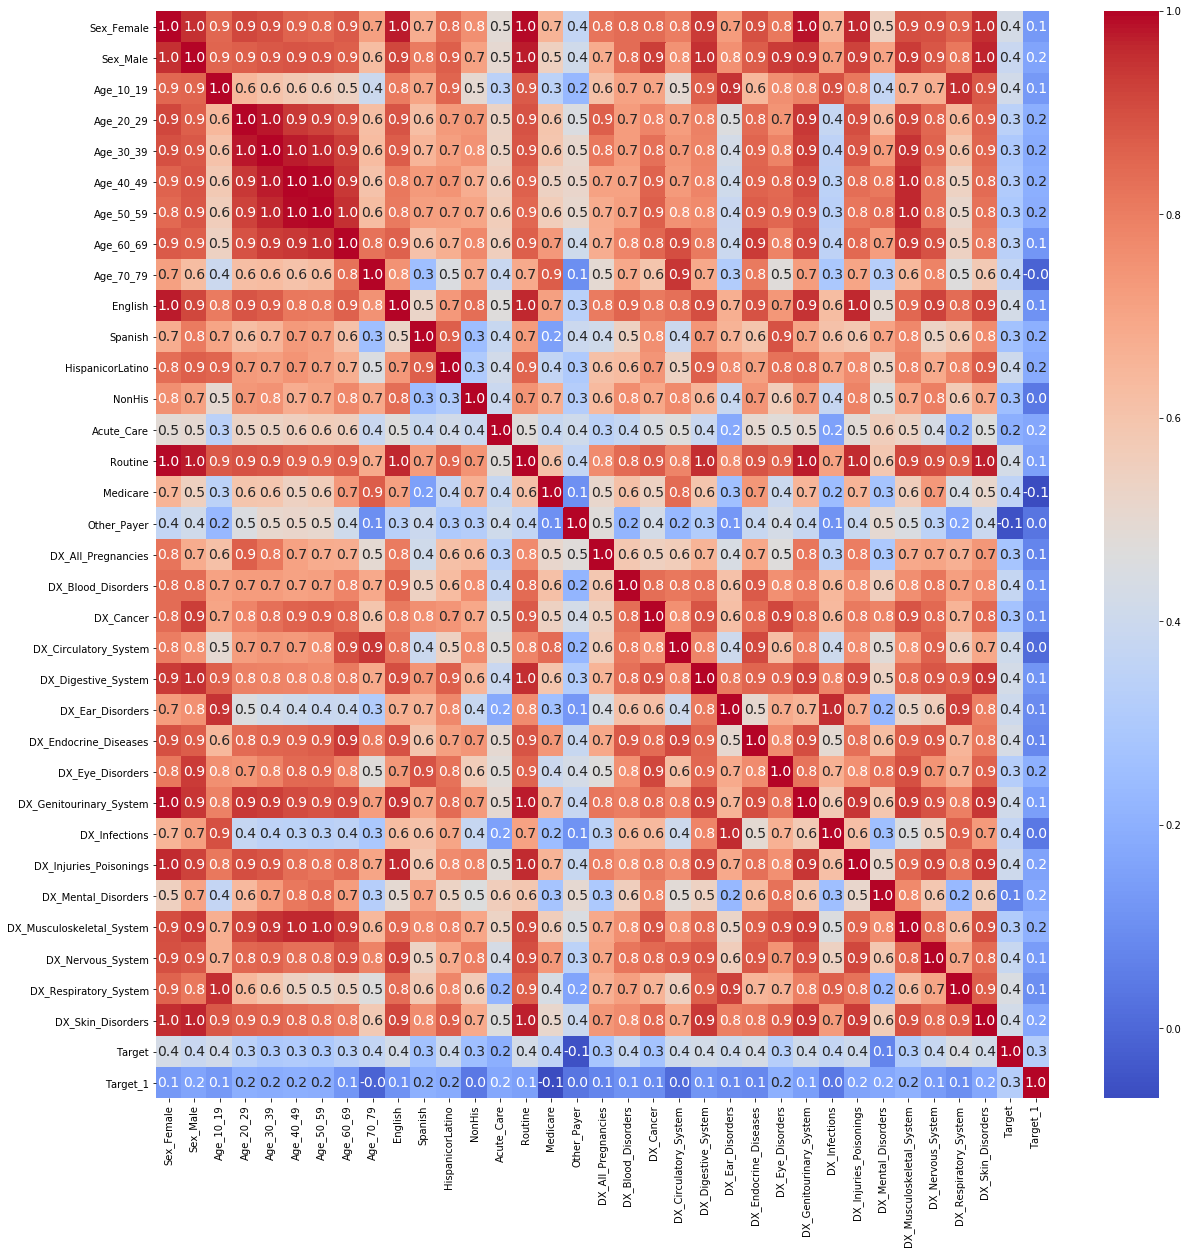

In [69]:
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap='coolwarm', annot_kws={'size':14}, fmt=".1f")

## Make Predictions

In [49]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [50]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [ True False False  True  True]
Actual Labels: [True, False, False, False, False]


In [51]:
from sklearn.metrics import confusion_matrix
y_true = y_test[:5]
y_pred = prediction_labels
confusion_matrix(y_true, y_pred)


array([[2, 2],
       [0, 1]], dtype=int64)

In [52]:
from sklearn.metrics import cohen_kappa_score
y_true = y_test[:5]
y_pred = prediction_labels
cohen_kappa_score(y_true, y_pred)

0.2857142857142857

In [53]:
predictions = model.predict_classes(X_test_scaled)
labels = label_encoder.inverse_transform(predictions)
actual = list(labels)
predicted = list(y_test)

In [55]:
from sklearn.metrics import confusion_matrix
y_true = actual
y_pred = predicted
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [8, 5]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
y_true = actual
y_pred = predicted
target_names = ['class 0 - false', 'class 1 - true']
print(classification_report(y_true, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

class 0 - false       0.33      0.80      0.47         5
 class 1 - true       0.83      0.38      0.53        13

       accuracy                           0.50        18
      macro avg       0.58      0.59      0.50        18
   weighted avg       0.69      0.50      0.51        18



In [62]:
results = grid.cv_results_
results

{'mean_fit_time': array([0.00200052, 0.002001  , 0.00160027, 0.00160041, 0.00160069,
        0.00160031, 0.00180016, 0.00140047, 0.00140023, 0.00180039,
        0.00160027, 0.00160055, 0.00160031, 0.00180078, 0.00200047,
        0.00140009]),
 'std_fit_time': array([6.32937583e-04, 7.74768677e-07, 4.90076868e-04, 4.89804070e-04,
        4.89940525e-04, 4.90018369e-04, 3.99994889e-04, 4.89881945e-04,
        4.90271597e-04, 3.99994918e-04, 4.90271319e-04, 4.89920871e-04,
        4.89921288e-04, 4.00185851e-04, 1.90734863e-07, 4.89609572e-04]),
 'mean_score_time': array([0.00060034, 0.00039988, 0.00040011, 0.00040002, 0.00040002,
        0.00040011, 0.00019994, 0.0006001 , 0.00060043, 0.00020003,
        0.00040002, 0.00040007, 0.00040002, 0.00060015, 0.00059986,
        0.00080032]),
 'std_score_time': array([0.00049017, 0.00048975, 0.00049004, 0.00048992, 0.00048992,
        0.00049004, 0.00039988, 0.00048998, 0.00049025, 0.00040007,
        0.00048992, 0.00048998, 0.00048992, 0.000490

In [63]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(2, 403, 10)},
           

In [64]:
results = gs.cv_results_
results

{'mean_fit_time': array([0.00400038, 0.00300012, 0.00340056, 0.00320001, 0.00280056,
        0.00320058, 0.00220027, 0.00200052, 0.00240078, 0.00220027,
        0.00199971, 0.00240049, 0.00220079, 0.00200014, 0.00200033,
        0.00240011, 0.00240064, 0.00220046, 0.00200038, 0.00220037,
        0.00200057, 0.00220056, 0.00220032, 0.00200038, 0.00220065,
        0.00220032, 0.00220027, 0.00220032, 0.00220013, 0.00200067,
        0.00240083, 0.0026011 , 0.00220027, 0.00220127, 0.00200038,
        0.00200019, 0.00200057, 0.00219998, 0.00240064, 0.00260048,
        0.00260019]),
 'std_fit_time': array([5.30983387e-07, 1.90734863e-07, 4.89784930e-04, 3.99852094e-04,
        3.99995202e-04, 4.00042800e-04, 3.99399003e-04, 1.78416128e-07,
        4.89862975e-04, 3.99279634e-04, 6.32595976e-07, 4.89707086e-04,
        4.00090768e-04, 1.78416128e-07, 5.22348936e-07, 4.90116544e-04,
        8.00251980e-04, 4.00257253e-04, 3.16297988e-07, 3.99947291e-04,
        4.26496120e-07, 4.00447987e-04, 4

In [65]:
print(gs.best_params_)
print(gs.best_score_)

{'min_samples_split': 42}
0.6287499999999999
